<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#An-Ad-A/B-Testing-(BINOM)" data-toc-modified-id="An-Ad-A/B-Testing-(BINOM)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>An Ad A/B Testing (BINOM)</a></span></li></ul></div>

## An Ad A/B Testing (BINOM)

https://www.kaggle.com/code/drindeng/an-ad-a-b-testing-binom

Experiment Approach

Null Hypothesis Hₒ: p = pₒ "There is no significant difference between the ad success rate of both groups"

Alternative Hypothesis Hₐ: p ≠ pₒ "There is significant difference between the ad success rate of both groups"

Confidence Level: 95% (α=0.05)

*we will perform a two-tailed test


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom
import seaborn as sns

In [2]:
df=pd.read_csv("AdSmartABdata - AdSmartABdata.csv")


In [4]:
# KEEP


## Check non-answer observations (both 'yes' and 'no' columns are equal to 0)

df_NoAns = df[(df['yes'] == 0) & (df['no'] == 0)]
df_NoAns

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [6]:
df_AfterNoAns= df.drop(df_NoAns.index)

df_AfterNoAns.shape

(1243, 9)

In [7]:
df_AfterNoAns.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [8]:
### KEEEP

Exper= df_AfterNoAns.groupby(['experiment']).sum()
Exper


,hour,platform_os,yes,no
experiment,,,,
control,7282,3503,264,322
exposed,7038,3938,308,349


In [9]:
df_AfterNoAns['experiment'].value_counts()


exposed    657
control    586
Name: experiment, dtype: int64

In [10]:
Num_con= df_AfterNoAns.experiment.value_counts().control
Num_con



586

In [11]:
Num_exp= df_AfterNoAns.experiment.value_counts().exposed
Num_exp

657

In [12]:
Exper_YesNo= df_AfterNoAns.groupby('experiment')['yes','no'].sum()
Exper_YesNo


/tmp/ipykernel_34394/583648682.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Exper_YesNo= df_AfterNoAns.groupby('experiment')['yes','no'].sum()


,yes,no
experiment,,
control,264,322
exposed,308,349


In [17]:
Exper_Yes= df_AfterNoAns.groupby('experiment')['yes'].sum()
Exper_Yes

experiment
control    264
exposed    308
Name: yes, dtype: int64

In [18]:
Con_Yes=Exper_Yes.iloc[0]
Exp_Yes=Exper_Yes.iloc[1]

rate_con, rate_exp = Con_Yes/Num_con, Exp_Yes/Num_exp
print(rate_con)
print(rate_exp)

0.45051194539249145
0.4687975646879756


<BarContainer object of 200 artists>

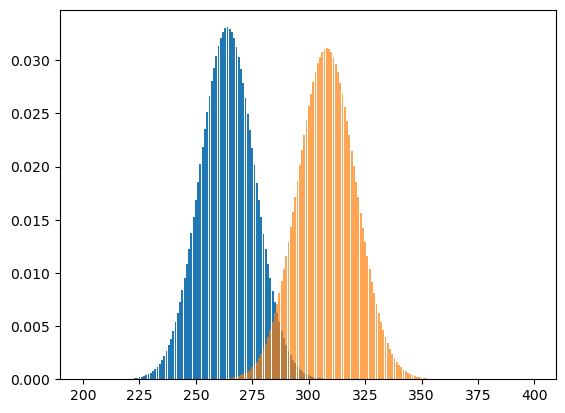

In [19]:
##################?????????????????????????????

clicks = np.arange(200,400)

prob_a = binom(Num_con, rate_con).pmf(clicks)#probability mass function
prob_b = binom(Num_exp, rate_exp).pmf(clicks)

plt.bar(clicks, prob_a, label='A', alpha=1) 
plt.bar(clicks, prob_b, label='B', alpha=0.7)

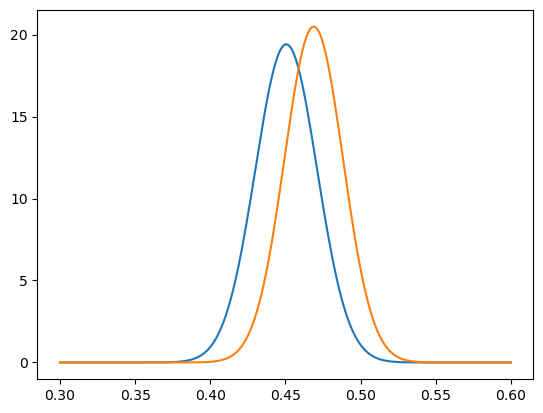

In [20]:
from scipy.stats import norm

std_a=np.sqrt(rate_con * (1-rate_con)/Num_con)
std_b=np.sqrt(rate_exp * (1-rate_exp)/Num_exp)

click_rateN = np.linspace(0.30,0.60, 200)
prob_aN = norm(rate_con, std_a).pdf(click_rateN) #The probability density function
prob_bN = norm(rate_exp, std_b).pdf(click_rateN)

plt.plot(click_rateN, prob_aN, label='A')
plt.plot(click_rateN, prob_bN, label='B')